## Importing libiraries

In [285]:
from numpy import *
from pandas import *
from matplotlib import pyplot as plt
import seaborn as snp
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [286]:
cars_data=read_csv(r"C:\Users\DELL\Documents\SKlearn\Projects\Car_sales.csv")

In [287]:
cars_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


# Data preprocessing

In [288]:
cars_data.shape

(157, 16)

In [289]:
cars_data.isnull().sum()   #Checking for null values

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [290]:
#Dropping unrequired columns
cars_data=cars_data.drop(columns=["__year_resale_value","Latest_Launch"])

In [291]:
#Dropping null values
cars_data=cars_data.dropna()

In [292]:
cars_data.shape

(152, 14)

In [293]:
# Duplicate values
cars_data.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2867c1ee6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2867c1eec70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2867c1ee400>],
 'medians': [<matplotlib.lines.Line2D at 0x2867c1fa280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2867c1fa550>],
 'means': []}

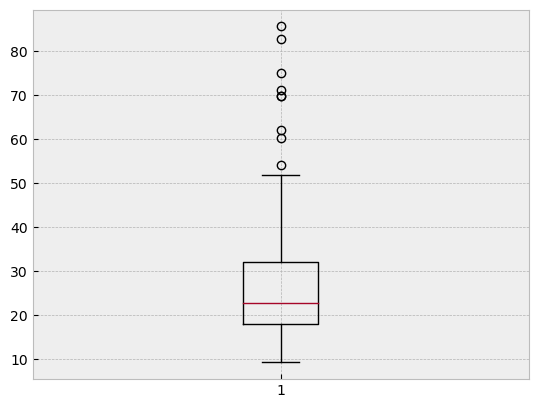

In [294]:
# Checking for outliers
plt.boxplot(cars_data["Price_in_thousands"])

In [295]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    object 
 1   Model               152 non-null    object 
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    object 
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Power_perf_factor   152 non-null    float64
dtypes: float64(11), object(3)
memory usage: 17.8+ KB


# Explaratory data analysis

In [296]:
cars_data.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [297]:
# Statistical values
cars_data.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,53.359072,27.331822,3.049342,184.809211,107.413816,71.088816,187.059211,3.376184,17.959211,23.842105,76.704153
std,68.938380,14.418669,1.049818,56.823152,7.717839,3.464666,13.471247,0.636593,3.937582,4.304788,25.180983
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.714000,17.888750,2.300000,147.500000,102.900000,68.375000,177.475000,2.964750,15.775000,21.000000,59.755537
50%,29.213000,22.747000,3.000000,175.000000,107.000000,70.400000,186.650000,3.336000,17.200000,24.000000,71.514623
75%,68.069750,31.938750,3.575000,211.250000,112.200000,73.100000,195.125000,3.821500,19.800000,26.000000,89.408406
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [298]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    object 
 1   Model               152 non-null    object 
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    object 
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Power_perf_factor   152 non-null    float64
dtypes: float64(11), object(3)
memory usage: 17.8+ KB


In [299]:
cars_data.nunique()

Manufacturer           30
Model                 151
Sales_in_thousands    152
Vehicle_type            2
Price_in_thousands    149
Engine_size            31
Horsepower             65
Wheelbase              88
Width                  77
Length                124
Curb_weight           144
Fuel_capacity          55
Fuel_efficiency        20
Power_perf_factor     151
dtype: int64

In [300]:
cars_data["Manufacturer"].value_counts()

Ford          11
Dodge         10
Toyota         9
Mercedes-B     9
Chevrolet      9
Mitsubishi     7
Nissan         7
Chrysler       6
Pontiac        6
Lexus          6
Mercury        6
Volkswagen     6
Volvo          6
Honda          5
Oldsmobile     5
Saturn         5
Cadillac       4
Plymouth       4
Buick          4
Porsche        3
Acura          3
Audi           3
Jeep           3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [301]:
cars_data["Vehicle_type"].value_counts()

Passenger    112
Car           40
Name: Vehicle_type, dtype: int64

In [302]:
# Cares with best sales
cars_sales=cars_data.groupby("Manufacturer").mean()["Sales_in_thousands"].to_frame().sort_values(by=["Sales_in_thousands"],ascending=False)

Text(0, 0.5, 'Sales')

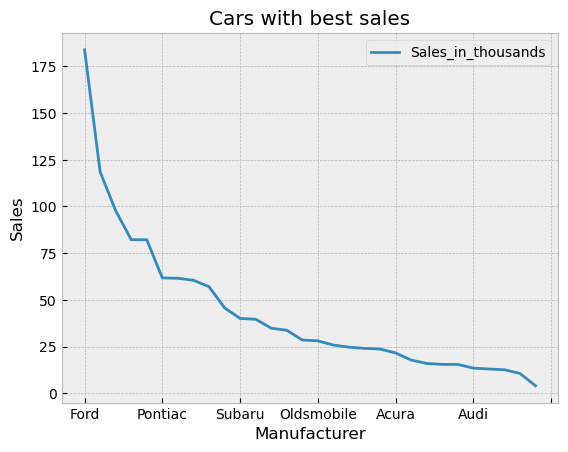

In [303]:
cars_sales.plot()
plt.title("Cars with best sales")
plt.ylabel("Sales")

In [304]:
# Cares with the highest horse power
cars_horse_power=cars_data.groupby(["Manufacturer","Model"]).mean()["Horsepower"].to_frame().sort_values(by=["Horsepower"],ascending=False)

In [305]:
cars_horse_power[:10]

Horsepower
Manufacturer Model                     
Dodge        Viper                450.0
Chevrolet    Corvette             345.0
Audi         A8                   310.0
Mercedes-B   CL500                302.0
             SL-Class             302.0
Lincoln      Navigator            300.0
Lexus        GS400                300.0
Porsche      Carrera Cabrio       300.0
             Carrera Coupe        300.0
Lexus        LS400                290.0

<AxesSubplot:>

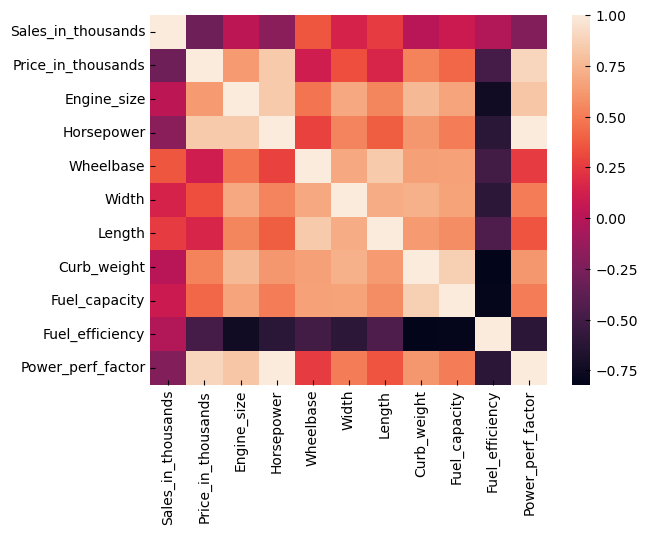

In [306]:
# Finding correlations between features
snp.heatmap(cars_data.corr())

Text(0, 0.5, 'Price')

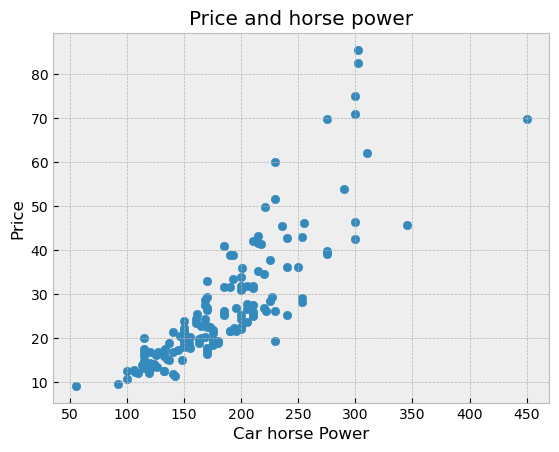

In [307]:
plt.style.use("bmh")
plt.scatter(cars_data["Horsepower"],cars_data["Price_in_thousands"])
plt.title("Price and horse power")
plt.xlabel("Car horse Power")
plt.ylabel("Price") 

# Predicting car price

In [308]:
cars_data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor'],
      dtype='object')

In [309]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    object 
 1   Model               152 non-null    object 
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    object 
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Power_perf_factor   152 non-null    float64
dtypes: float64(11), object(3)
memory usage: 17.8+ KB


In [310]:
# the features
X=cars_data.drop(columns=["Sales_in_thousands","Price_in_thousands"])

In [311]:
#The target
y=cars_data["Price_in_thousands"]

In [312]:
LE=LabelEncoder()

In [313]:
X["Manufacturer"]=LE.fit_transform(X["Manufacturer"])
X["Model"]=LE.fit_transform(X["Model"])
X["Vehicle_type"]=LE.fit_transform(X["Vehicle_type"])

In [314]:
X

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,0,78,1,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,0,139,1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,0,112,1,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1,8,1,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,1,9,1,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,143,1,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,29,122,1,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,29,144,1,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,29,24,1,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [315]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,
                                                    random_state=44, shuffle =True)

In [316]:
X_train.shape

(101, 12)

In [317]:
X_test.shape

(51, 12)

In [318]:
Z=X.columns

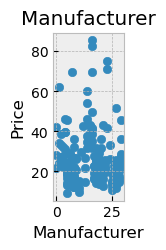

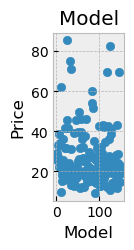

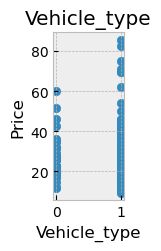

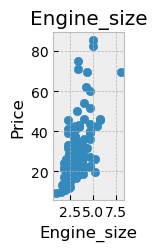

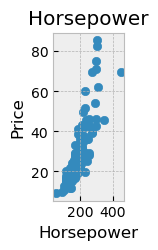

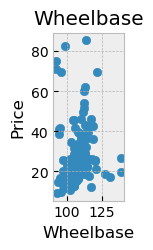

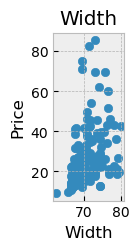

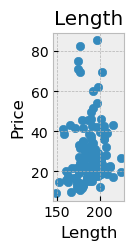

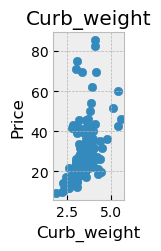

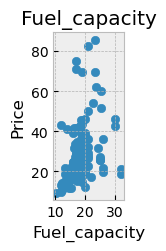

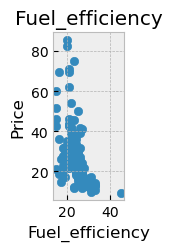

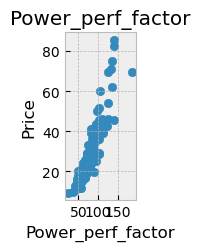

In [338]:
# Plotting the relation between the variables
for i in Z:
    s=1
    plt.subplot(2,6,1)
    plt.style.use("bmh")
    plt.scatter(X[i],y)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Price") 
    s+=1
    plt.show()
    

In [328]:
#Building the model
LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)

In [329]:
#Training the model
LinearRegressionModel.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [330]:
#Score for training set
LinearRegressionModel.score(X_train, y_train)

1.0

In [331]:
#Score for testing set
LinearRegressionModel.score(X_test, y_test)

1.0

In [332]:
# Predicting the values of test set
y_pre=LinearRegressionModel.predict(X_test)

In [333]:
y_pre[:10]

array([26.93499998, 31.59799999, 22.245     , 17.50000001,  9.69899999,
       21.97500001, 19.04500001, 26.89499999, 16.70000001, 36.22900003])

In [334]:
y_test[:10]

56     26.935
112    31.598
30     22.245
149    17.500
62      9.699
10     21.975
36     19.045
69     26.895
146    16.700
111    36.229
Name: Price_in_thousands, dtype: float64

In [335]:
#Calculating The mean square error for the model
MSE=mean_squared_error(y_test,y_pre)

In [336]:
MSE

5.333992635732933e-16

In [337]:
#Using the model for prediction
LinearRegressionModel.predict(array([1,9,1,3,200,108,77,190,3.55,19,22,85]).reshape(1,-1))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.94230016])